In [245]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from numpy import linalg as LA

%matplotlib inline

q=1000
n=50
sigma_vec=[]

i = np.linspace(1, 50, num=5)

beta=np.random.normal(0, 1, q)
X=np.random.normal(0, 1, (n,q))

for SNR in i:
    gamma=SNR
    sigma = np.sqrt(LA.norm(X.dot(beta))**2/(n-1))/gamma
    epsilon=np.random.normal(0, sigma**2, n)
    sigma_vec.append(sigma)
    
print('The sigma vector=', sigma_vec)


#sparse level
sparse_level=0.5

zero_one = np.random.choice([0, 1], size=q, p=[sparse_level, 1-sparse_level])


beta = beta*zero_one
y_mat=[]
for sigma in sigma_vec:
    epsilon=np.random.normal(0, sigma**2, n)
    y_prel=X.dot(beta)+epsilon
    y_mat=np.hstack((y_mat,y_prel))
    
    
y1=y_mat[:50]

#print(y1)

y2=y_mat[50:100]
#print(y2)

y3=y_mat[100:150]
#print(y3)

y4=y_mat[150:200]
#print(y4)

y5=y_mat[200:250]


The sigma vector= [33.45270329312484, 2.524732324009422, 1.3118707173774447, 0.8861643256456911, 0.6690540658624968]


The optimal lambda is: 85.36391300046768
The mean squared error is: 956039.2097457289


AttributeError: 'numpy.float64' object has no attribute 'pop'

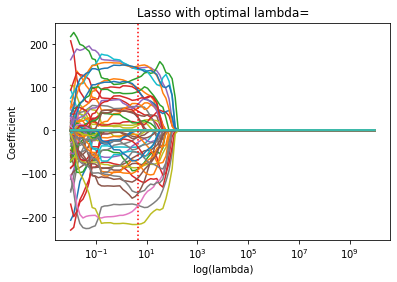

In [246]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

#change y for different sigma
y=y1

#generating an array of alpha (lambda) values ranging from very big to very small
alphas = 10**np.linspace(10,-2,100)*0.5

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('log(lambda)')
plt.ylabel('Coefficient')
plt.title('Lasso with optimal lambda=')

########################################

# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#perform 10-fold cross-validation to choose the best lambda
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

#refit the model
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print('The optimal lambda is:',lassocv.alpha_)

#compute the associated test error:
y_pred=lasso.predict(X_test)
meanSqError=mean_squared_error(y_test, y_pred)
print('The mean squared error is:', meanSqError)

plt.axvline(x=np.log(lassocv.alpha_),color='red',linestyle='dotted')
plt.title('Lasso with optimal lambda=%s' %(round(lassocv.alpha_,3)))

In [ ]:
true_positive=0
false_positive=0
true_negative=0
false_negative=0

beta_hat=lasso.coef_

for i in range(q):
    if beta_hat[i]!=0:
        if beta[i]!=0:
            true_positive=true_positive+1
        else:
            false_positive=false_positive+1
    else:
        if beta[i]==0:
            false_negative=false_negative+1
        else:
            true_negative=true_negative+1
            
print('TP=',true_positive)
print('FP=',false_positive)
print('TN=',true_negative)
print('FN=',false_negative)

#sensitivity
sensitivity=true_positive/(true_positive+false_negative)

#specificity
specificity=true_negative/(true_negative+false_positive)

accuracy=(true_positive+true_negative)/(true_positive+true_negative+false_negative+false_positive)

print('The sensitivity for the %s sparse level is %s' % (sparse_level, sensitivity))
print('The specificity for %s sparse level is %s' % (sparse_level, specificity))
print('The accuracy for the model is',accuracy)